In [200]:
# import tensorflow
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import mglearn
from sklearn.svm import SVC
from sklearn import metrics

In [201]:
data = np.load('./data/olivetti_faces.npy')
# label = np.load('./data/olivetti_faces_target.npy')
label = np.zeros(len(data))

In [202]:
def load_data_true(img_folder):
    imgs = []
    for img in os.listdir(img_folder):
        img = cv2.imread(os.path.join(img_folder, img), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))
        imgs.append(img)
        
    return np.array(imgs)

data_face = load_data_true('./data_true/images')
data_face2 = load_data_true('./data_true/image2')
data_face = np.concatenate((data_face, data_face2), axis=0)
# label_face = np.ones(len(data_face))
label_face = np.full(len(data_face), 1)

In [203]:
print(data_face.shape)

(618, 64, 64)


In [204]:
def normailze_data_face(data):
    data = data.astype('float64')
    data /= 255
    return data
data_face = normailze_data_face(data_face)

In [205]:
print(f'data shape: {data.shape}')
print(f'label shape: {label.shape}')
print(f'data_face shape: {data_face.shape}')
print(f'label_face shape: {label_face.shape}')

data shape: (400, 64, 64)
label shape: (400,)
data_face shape: (618, 64, 64)
label_face shape: (618,)


In [206]:
print(data[0])

[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
 [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
 [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
 ...
 [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
 [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
 [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]


In [207]:
print(data_face[0])

[[0.30588235 0.40392157 0.43529412 ... 0.90980392 0.92156863 0.92156863]
 [0.37254902 0.45098039 0.41960784 ... 0.88235294 0.84313725 0.90980392]
 [0.82352941 0.79215686 0.77254902 ... 0.89411765 0.90980392 0.8627451 ]
 ...
 [0.32156863 0.32156863 0.35686275 ... 0.51372549 0.78039216 0.84313725]
 [0.16470588 0.22352941 0.29019608 ... 0.19607843 0.2745098  0.34117647]
 [0.21960784 0.23137255 0.16078431 ... 0.10588235 0.14901961 0.20784314]]


In [208]:
# concat data
data = np.concatenate((data, data_face), axis=0)
label = np.concatenate((label, label_face), axis=0)
label = label.astype(int)

In [209]:
print(f'data shape: {data.shape}')
print(f'label shape: {label.shape}')
print(f'uniques label: {np.unique(label)}')

data shape: (1018, 64, 64)
label shape: (1018,)
uniques label: [0 1]


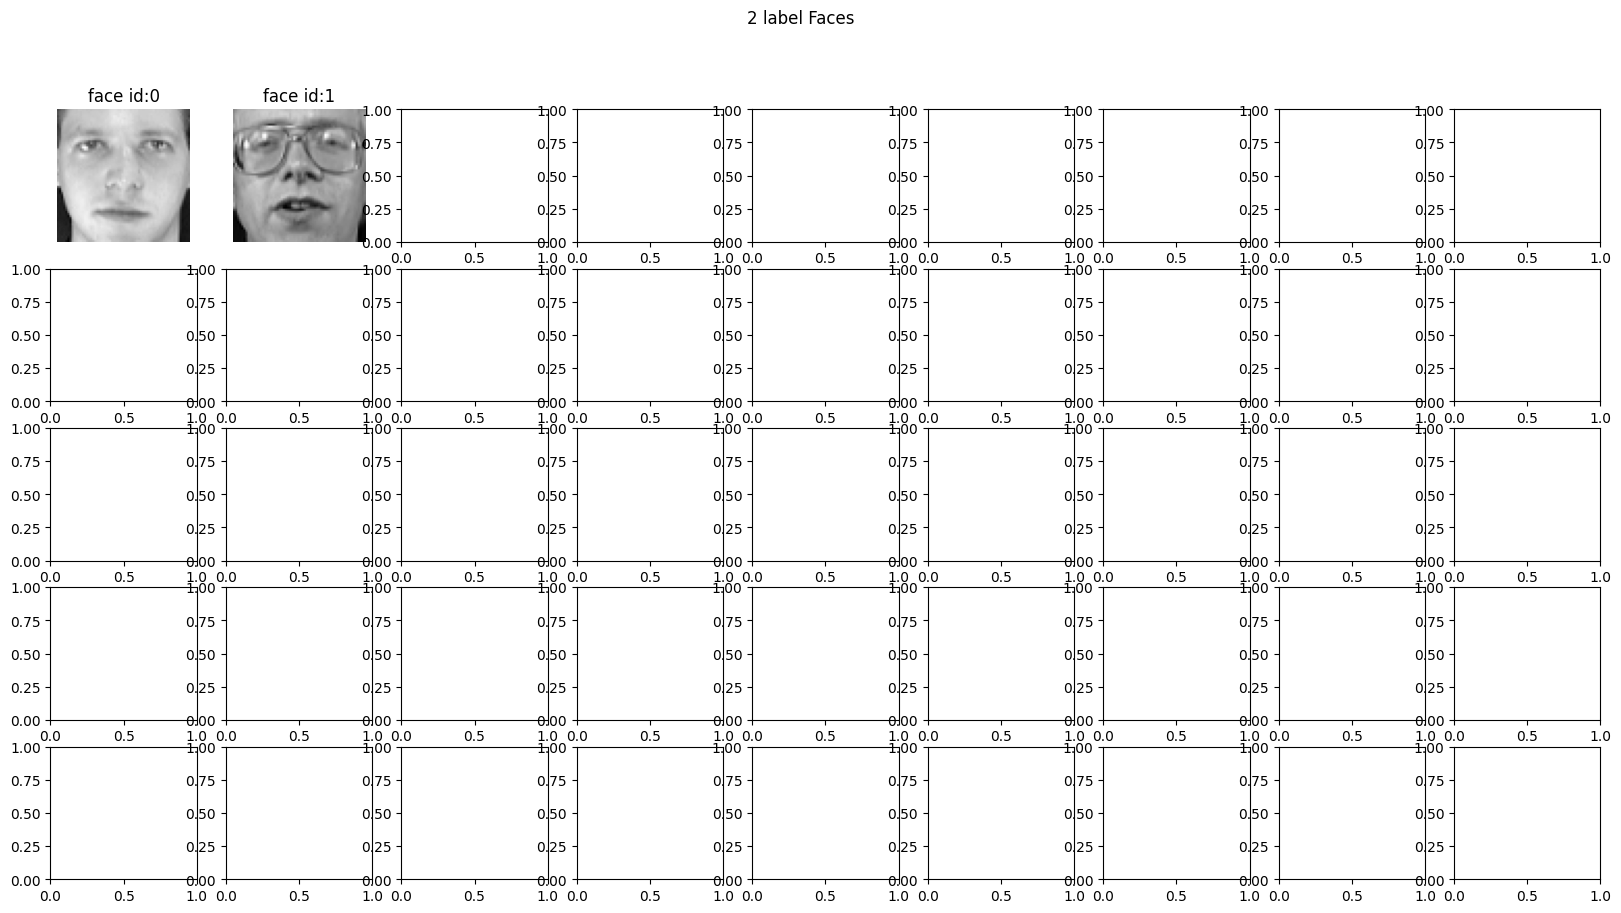

In [210]:
def show_face_of_40_distinct(images, unique_ids):
    fig, ax = plt.subplots(5,9,figsize=(20,10))
    ax=ax.flatten()
    # 2 buc anh nhan khac nhau o vi tri 399 va 400
    for unique_id in unique_ids:
        image_idx = unique_id * 10
        ax[unique_id].imshow(images[image_idx], cmap='gray')
        ax[unique_id].set_title(f"face id:{unique_id}")
        ax[unique_id].axis('off')
    plt.suptitle("2 label Faces")

show_face_of_40_distinct(data, np.unique(label))

In [211]:
def show_10_face_of_2_class(images,subject_ids):
    cols = 10
    rows = len(subject_ids)
    print(rows)
    fig, ax = plt.subplots(rows,cols,figsize=(15,20))
    
    for idx, value in enumerate(subject_ids):
        for j in range(cols):
            img_idx = value*10 + j
            ax[idx,j].imshow(images[img_idx], cmap='gray')
            ax[idx,j].axis('off')
            ax[idx,j].set_title(f"face id:{value}")

2


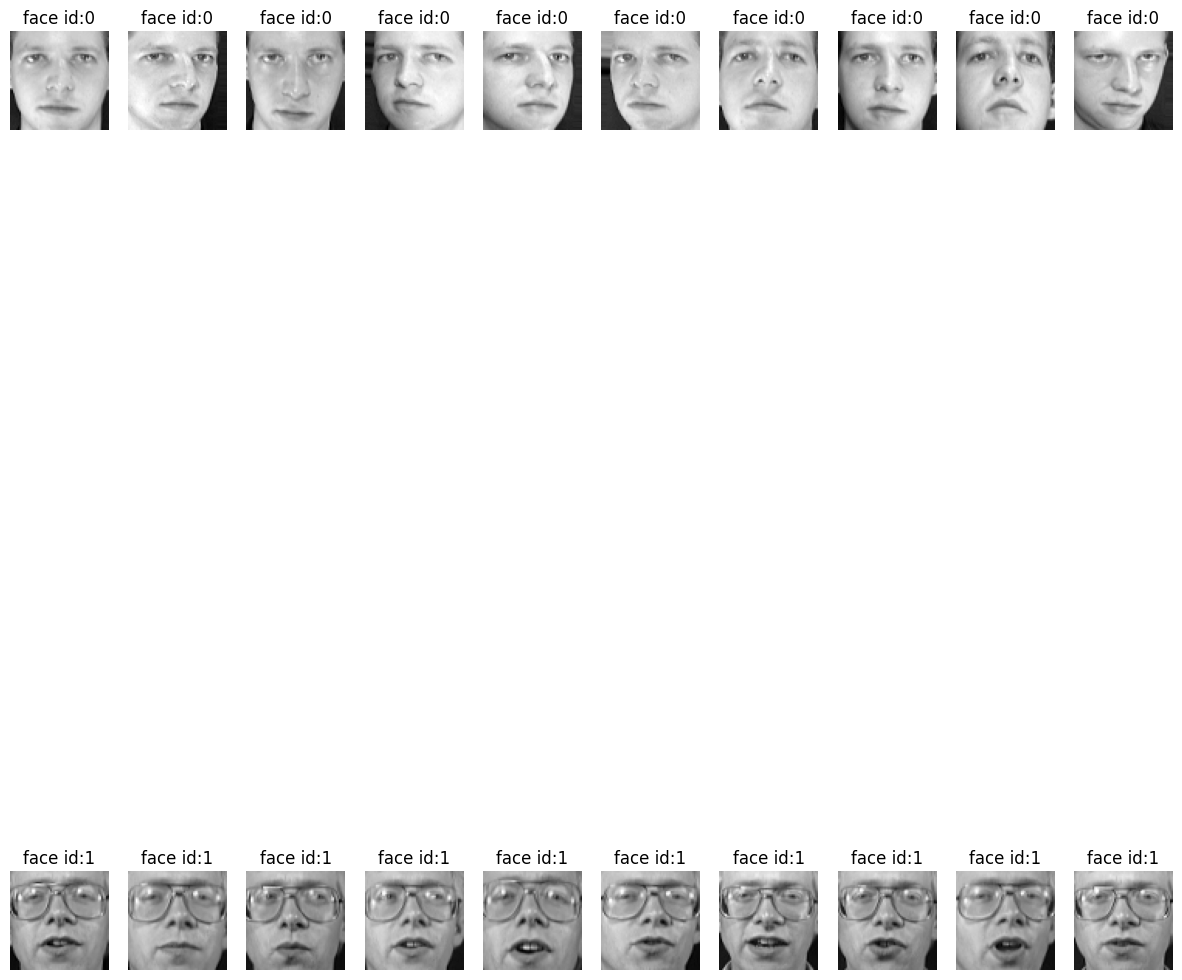

In [212]:
show_10_face_of_2_class(data, subject_ids=[0,1])

In [213]:
X = data.reshape((data.shape[0], data.shape[1]*data.shape[2]))
print('X shape:', X.shape)

X shape: (1018, 4096)


In [214]:
x_train, x_test, y_train, y_test = train_test_split(X, label, test_size=0.2,stratify=label, random_state=42,shuffle=True)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (814, 4096)
x_test shape: (204, 4096)


In [215]:
print('class: ',len(np.unique(y_train)))

class:  2


<Axes: title={'center': 'Number of Samples for Each Classes'}, xlabel='subject ids'>

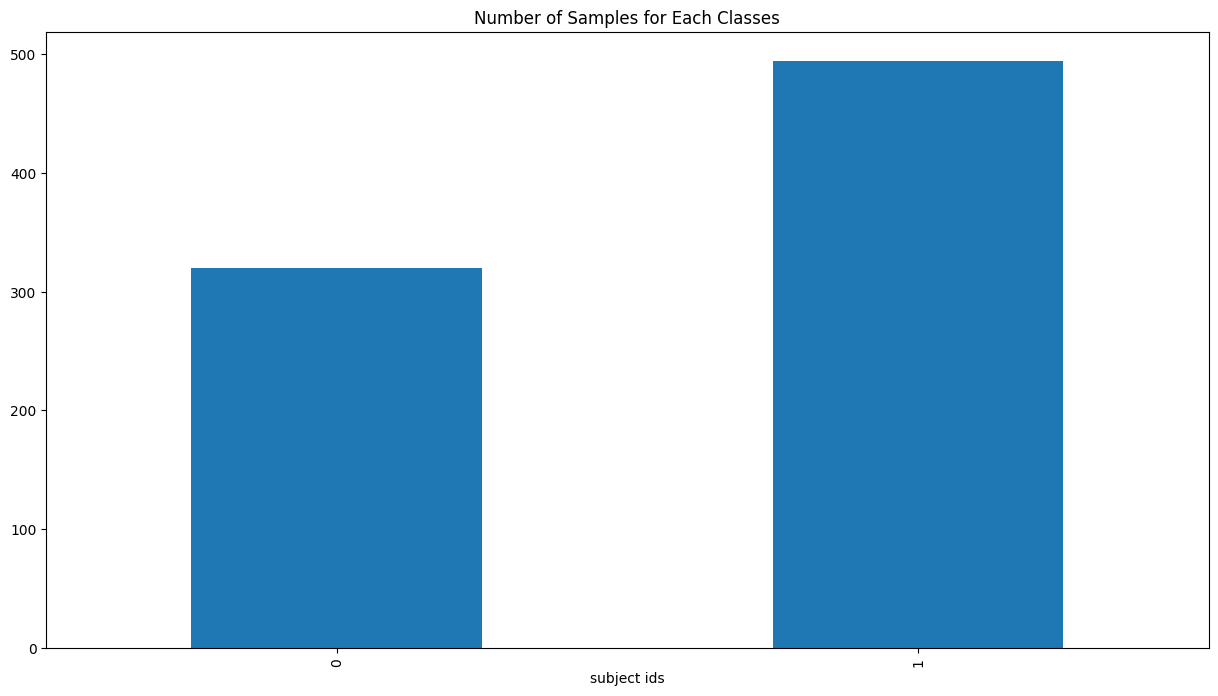

In [216]:
y_frame=pd.DataFrame()
y_frame['subject ids']= y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [217]:
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

In [218]:
print("original shape: ", X.shape)
print("transformed shape: ", X_pca.shape)
print(X_pca[0])

original shape:  (1018, 4096)
transformed shape:  (1018, 2)
[13.86623128 -3.10707565]


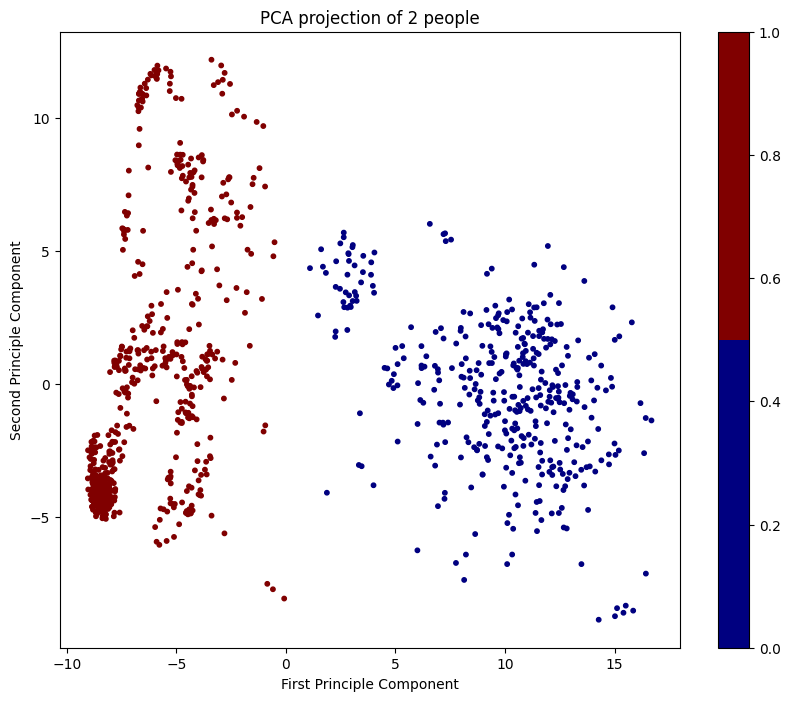

In [219]:
number_of_people=2
index_range=number_of_people*566
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=label[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

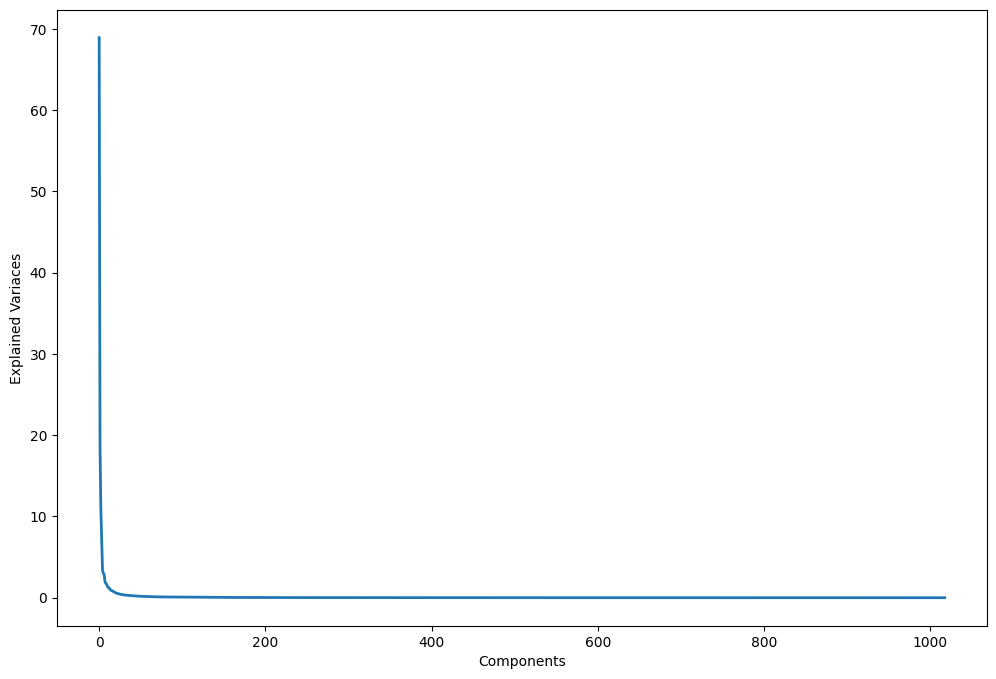

In [220]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [221]:
n_components = 50

In [222]:
pca = PCA(n_components=n_components, whiten=True).fit(x_train)
print(pca.components_.shape)
print(pca.mean_.shape)

(50, 4096)
(4096,)


Text(0.5, 1.0, 'Average Face')

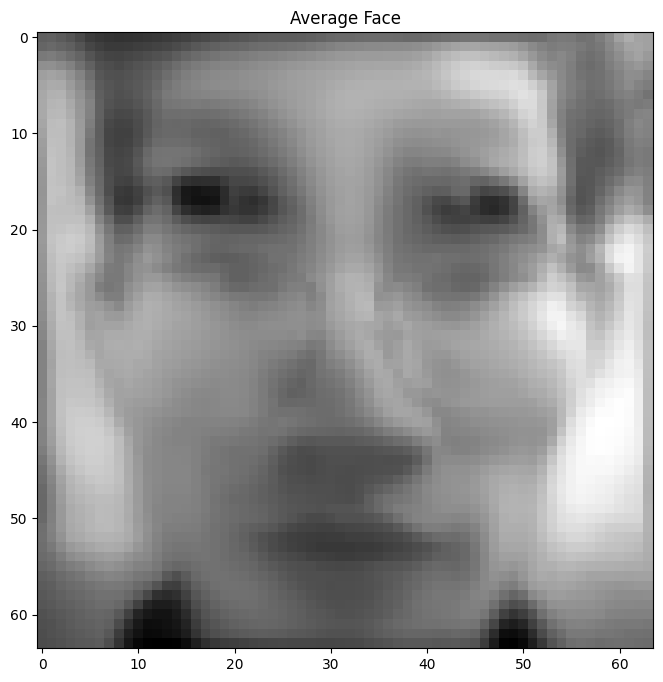

In [223]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_title('Average Face')

50


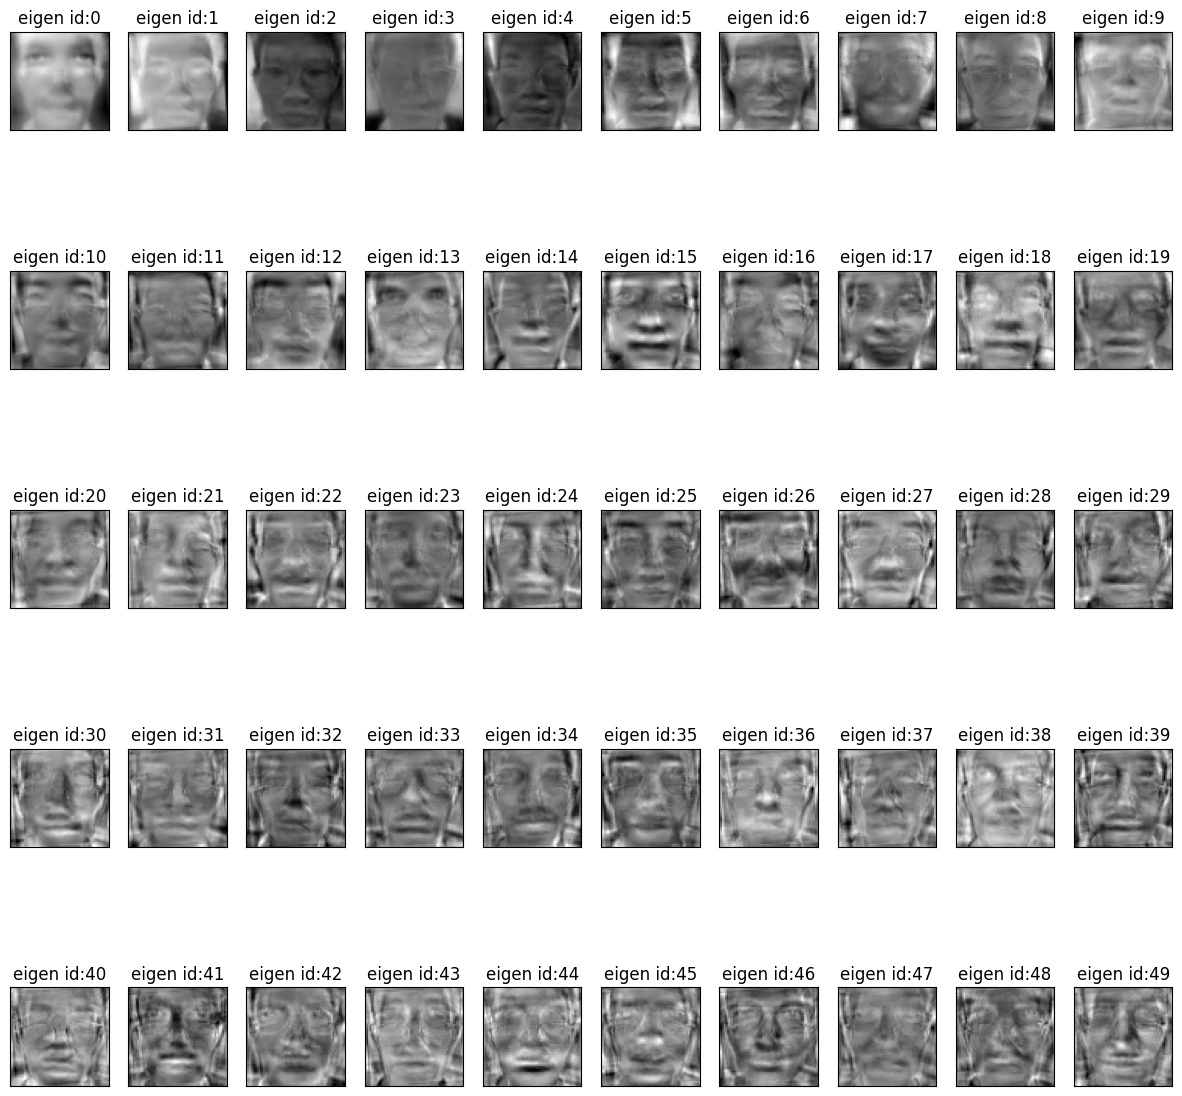

In [224]:
number_of_eigenfaces=len(pca.components_)
print(number_of_eigenfaces)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
# plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [225]:
X_train_pca=pca.transform(x_train)
X_test_pca=pca.transform(x_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(814, 50)
(204, 50)


In [226]:
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Embedding, Dense, Input, Dropout
# from keras.optimizers import Adam

# def define_model(n_components=4096):
#     x = Input(shape=(n_components,))
#     em = Embedding(256, 128)(x)
#     flat = tf.keras.layers.Flatten()(em)
#     d = Dense(128, activation='relu')(flat)
#     d = Dropout(0.5)(d)
#     # d = Dense(512, activation='relu')(d)
#     # d = Dense(256, activation='relu')(d)
#     # d = Dense(128, activation='relu')(d)
#     d = Dense(64, activation='relu')(d)
#     # d = Dense(32, activation='relu')(d)
#     # d = Dense(16, activation='relu')(d)
#     d = Dense(41, activation='softmax')(d)
#     model = tf.keras.Model(inputs=x, outputs=d)
#     model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# model = define_model(n_components)
# model.fit(X_train_pca, y_train, epochs=100, batch_size=32, validation_data=(X_test_pca, y_test))

# plt.plot(model.history.history['accuracy'], label='accuracy')
# plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0, 1])
# plt.legend(loc='lower right')
# plt.show()

In [227]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("classification report:\n{}".format(metrics.classification_report(y_test, y_pred)))
# save model 
import pickle
filename = './models/model_face_not_41.sav'
pickle.dump(clf, open(filename, 'wb'))
# save pca
filename = './models/pca_face_not_41.sav'
pickle.dump(pca, open(filename, 'wb'))

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00       124

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



In [228]:
# clf = SVC()
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)
# print("classification report:\n{}".format(metrics.classification_report(y_test, y_pred)))